<a href="https://colab.research.google.com/github/RC11-SkillsClass2022-23/XingFeng/blob/main/XingFengImageClassificationHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np

In [30]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [31]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

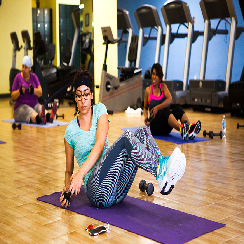

In [32]:
workout_image_id = os.listdir('/content/drive/MyDrive/SkillWorkshop/Image/workout')[0]
workout_path = os.path.join('/content/drive/MyDrive/SkillWorkshop/Image/workout', workout_image_id)
workout_image = load_image(workout_path)

tf.keras.preprocessing.image.load_img(workout_path, target_size=(244,244))

In [33]:
print(f'shape: {workout_image.shape}')
print(f'type: {type(workout_image)}')

shape: (1, 224, 224, 3)
type: <class 'numpy.ndarray'>


In [34]:
model.predict(workout_image)

1/1 [==============================] - 1s 508ms/step


array([[2.24926168e-07, 9.18919170e-07, 1.35067676e-05, 4.37997323e-06,
        1.34286902e-05, 4.21312905e-07, 1.01326797e-04, 1.95794883e-06,
        1.20029131e-06, 2.02857200e-06, 1.80040763e-06, 3.56104943e-06,
        6.32979095e-07, 4.98681857e-07, 7.00358100e-07, 9.13318047e-07,
        4.20742163e-06, 1.30620197e-06, 1.71495369e-08, 1.14162481e-06,
        9.89473747e-08, 4.05346213e-07, 4.61728753e-08, 4.64866048e-07,
        1.88553116e-07, 8.02745490e-07, 3.63271681e-07, 5.67771465e-08,
        5.02674266e-06, 2.37297559e-08, 2.25948588e-06, 1.54628879e-07,
        9.64192068e-08, 8.73001954e-06, 1.02250976e-03, 8.62236448e-06,
        2.10034905e-05, 2.18648711e-05, 2.76248819e-08, 6.07411948e-07,
        8.00478404e-08, 2.11939167e-07, 1.09072587e-07, 1.65122316e-07,
        1.42378667e-07, 4.61268019e-06, 1.38873766e-08, 8.36227571e-07,
        1.71725159e-08, 5.90245108e-05, 1.11600202e-05, 9.06535115e-06,
        3.26336902e-07, 4.98129509e-07, 1.17652564e-06, 2.449152

In [35]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

In [36]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [37]:
model.predict(workout_image).shape

1/1 [==============================] - 1s 790ms/step


(1, 1024)

In [38]:
x = Dropout(rate=0.4)(model.output)
x = Dense(4)(x)
x = Softmax()(x)
model = Model(model.inputs, x)

In [39]:
for layer in model.layers[:-3]:
  layer.trainable = False

In [40]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [41]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    '/content/drive/MyDrive/SkillWorkshop/Image', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    '/content/drive/MyDrive/SkillWorkshop/Image',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 392 images belonging to 4 classes.
Found 42 images belonging to 4 classes.


In [42]:
batch_size = 32

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    epochs=1,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

12/12 [==============================] - 194s 16s/step - loss: 1.7162 - val_loss: 0.9269


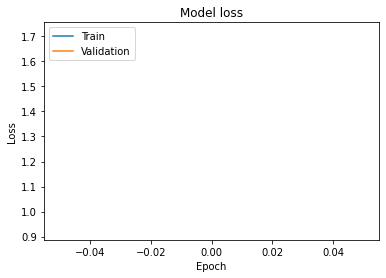

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
random_dance = random.choice(os.listdir('/content/drive/MyDrive/SkillWorkshop/Image/dance'))
dance_path = os.path.join('/content/drive/MyDrive/SkillWorkshop/Image/dance',random_dance)
dance = load_image(dance_path)
random_workout = random.choice(os.listdir('/content/drive/MyDrive/SkillWorkshop/Image/workout'))
workout_path = os.path.join('/content/drive/MyDrive/SkillWorkshop/Image/workout',random_workout)
workout = load_image(workout_path)
random_business = random.choice(os.listdir('/content/drive/MyDrive/SkillWorkshop/Image/business'))
business_path = os.path.join('/content/drive/MyDrive/SkillWorkshop/Image/business',random_business)
business = load_image(business_path)
random_protest = random.choice(os.listdir('/content/drive/MyDrive/SkillWorkshop/Image/protest'))
protest_path = os.path.join('/content/drive/MyDrive/SkillWorkshop/Image/protest',random_protest)
protest = load_image(protest_path)

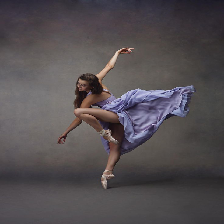

In [45]:
tf.keras.preprocessing.image.load_img(dance_path, target_size=(224,224))

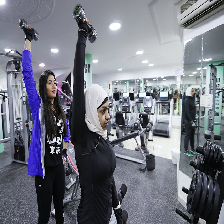

In [46]:
tf.keras.preprocessing.image.load_img(workout_path, target_size=(224,224))

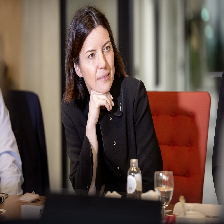

In [47]:
tf.keras.preprocessing.image.load_img(business_path, target_size=(224,224))

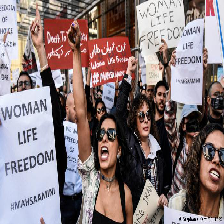

In [48]:
tf.keras.preprocessing.image.load_img(protest_path, target_size=(224,224))

In [49]:
print(f'''dance:{np.round(model.predict(dance),4)}''')

1/1 [==============================] - 1s 560ms/step
dance:[[0.1429 0.4306 0.2807 0.1458]]


In [50]:
print(f'''workout:{np.round(model.predict(workout),4)}''')

1/1 [==============================] - 0s 55ms/step
workout:[[0.1911 0.0689 0.6712 0.0689]]


In [51]:
print(f'''business:{np.round(model.predict(business),4)}''')

1/1 [==============================] - 0s 65ms/step
business:[[0.2088 0.0297 0.3662 0.3953]]


In [52]:
print(f'''protest:{np.round(model.predict(protest),4)}''')

1/1 [==============================] - 0s 59ms/step
protest:[[0.0505 0.0045 0.9386 0.0063]]


In [53]:
ballet_path = '/content/drive/MyDrive/SkillWorkshop/ballet.jpg'
ballet = load_image(ballet_path)

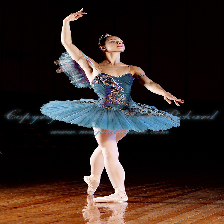

In [54]:
tf.keras.preprocessing.image.load_img(ballet_path, target_size=(224,224))

In [55]:
print(f'''ballet:{np.round(model.predict(ballet),4)}''')

1/1 [==============================] - 0s 73ms/step
ballet:[[0.0775 0.8427 0.0228 0.057 ]]
